In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Regresion lineal
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Evaluacion del modelo 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_excel("Datos140.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    int64  
 3   Tipo colegio               294 non-null    int64  
 4   Género                     294 non-null    int64  
 5   Estrato                    294 non-null    int64  
 6   Nota Matematicas           294 non-null    int64  
 7   Nota Lecto Escritura       294 non-null    int64  
 8   Apoyo económico de padres  294 non-null    int64  
 9   Último grado cursado       294 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.1 KB


In [4]:
matrix_corellacion = df.corr().abs()

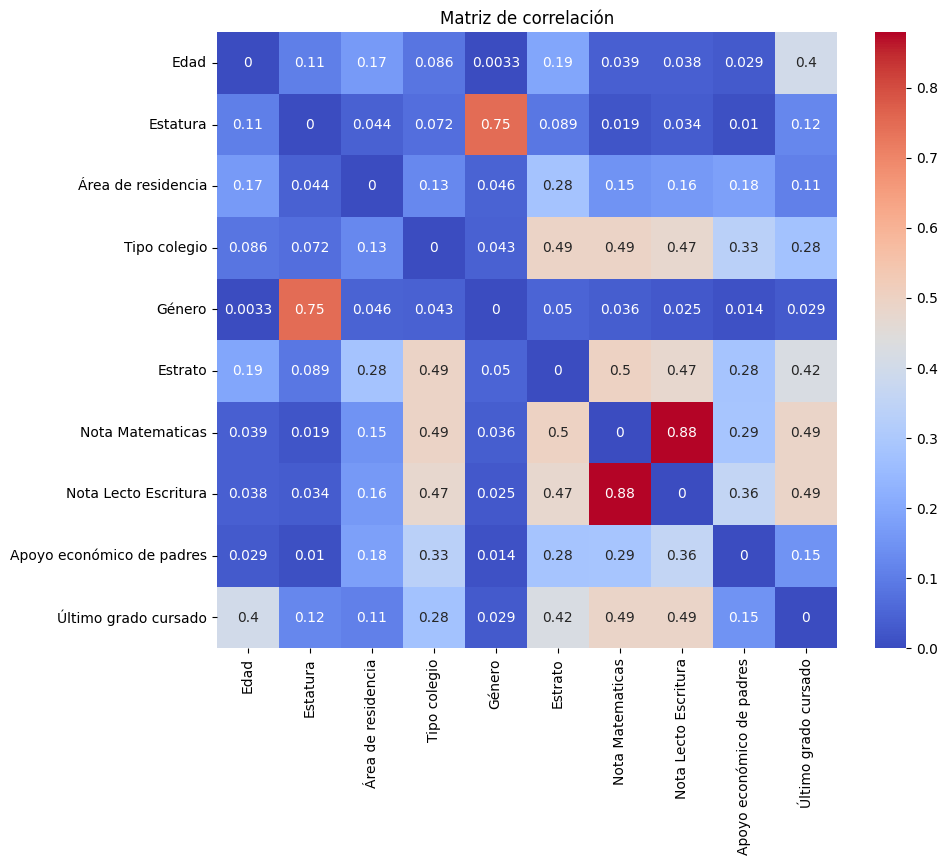

In [5]:
np.fill_diagonal(matrix_corellacion.values, 0)
mas_corelacion = matrix_corellacion.unstack().sort_values(ascending=False).drop_duplicates()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corellacion, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [6]:
df = df.drop(['Edad', 'Área de residencia', 'Género', 'Estatura',], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Tipo colegio               294 non-null    int64
 1   Estrato                    294 non-null    int64
 2   Nota Matematicas           294 non-null    int64
 3   Nota Lecto Escritura       294 non-null    int64
 4   Apoyo económico de padres  294 non-null    int64
 5   Último grado cursado       294 non-null    int64
dtypes: int64(6)
memory usage: 13.9 KB


In [7]:
df.columns=['tipo_colegio', 'estrato', 'matematicas', 'lecto_escritura', 'apoyo_economico', 'ultimo_grado']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tipo_colegio     294 non-null    int64
 1   estrato          294 non-null    int64
 2   matematicas      294 non-null    int64
 3   lecto_escritura  294 non-null    int64
 4   apoyo_economico  294 non-null    int64
 5   ultimo_grado     294 non-null    int64
dtypes: int64(6)
memory usage: 13.9 KB


In [8]:
df['promedio'] = (df['matematicas'] + df['lecto_escritura'] ) /2

In [9]:
# Crear la columna 'Riesgo' y asignar valores según el rango del promedio
# <=3 -> 0: Desercion - <=4 -> 1: Alerta - 2: Buen estudiante


df['Riesgo']  = np.where(df['promedio']<= 3, 0, np.where(df['promedio'] <= 4 ,1,2))


In [10]:
variables = ['tipo_colegio' , 'estrato', 'matematicas','lecto_escritura', 'apoyo_economico', 'ultimo_grado']


x=df[variables]
y=df['Riesgo']

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


In [13]:
model =LogisticRegression(max_iter=1000)
model.fit(X_train_scaler, Y_train, )

LogisticRegression(max_iter=1000)

In [14]:
y_pred=model.predict(X_test_scaler)

In [15]:
prediccion = accuracy_score(Y_test, y_pred)
print("prediccion del modelo: ", prediccion)

prediccion del modelo:  1.0


In [16]:
matriz_confusion = confusion_matrix(Y_test, y_pred)
print("matriz: ")
print(  matriz_confusion)

matriz: 
[[30  0  0]
 [ 0 17  0]
 [ 0  0 12]]


In [17]:
import pickle


with open('modelo_registros.pkl', "wb") as file:
    pickle.dump(model, file)